In [36]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [37]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [38]:
#import all necessary modules
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Update import path for ImageDataGenerator, remove 'image'
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout # Update import path for layers
from tensorflow.keras.models import Sequential,Model,load_model # Update import path for models
from tensorflow.keras import optimizers # Update import path for optimizers
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping # Update import path for callbacks
import numpy as np
import matplotlib.pyplot as plt



In [39]:
#define height and width of the image
height=300
width=300

#create a ResNet50 model instance without the top layer as we will add our own top layer
base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(height,width,3))

In [40]:
#define directory containing training and validation data
train_dir=r"C:\Users\ADMIN\Documents\Fake_Currency_Project\Dataset\Training"
validation_dir=r"C:\Users\ADMIN\Documents\Fake_Currency_Project\Dataset\Validation"

#number of batches the data has to be divided into
batch_size=8

#create datagen and generator to load the data from training directory
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=90,horizontal_flip=True,vertical_flip=True)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(height,width),batch_size=batch_size)

#create datagen and generator to load the data from validation directory
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=90,horizontal_flip=True,vertical_flip=True)
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(height,width),batch_size=batch_size)

Found 35 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [41]:
#our own model which will be added onto the ResNet50 model
def build_finetune_model(base_model,dropout,fc_layers,num_classes):
    for layer in base_model.layers:
        layer.trainable=False

    x=base_model.output
    x=Flatten()(x)
    for fc in fc_layers:
        x=Dense(fc,activation='relu')(x)
        x=Dropout(dropout)(x)
    
    predictions=Dense(num_classes,activation='softmax')(x)








    finetune_model=Model(inputs=base_model.input,outputs=predictions) 
    
    return finetune_model

class_list=['Real','Fake'] #the labels of our data
FC_Layers=[1024,1024]
dropout=0.5

finetune_model=build_finetune_model(base_model,dropout=dropout,fc_layers=FC_Layers,num_classes=len(class_list))

In [42]:
#define number of epochs(the number of times the model will be trained) and number of training images
num_epochs=100
num_train_images=35


In [43]:

!pip install pillow

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers

# ✅ Updated ModelCheckpoint
checkpoint = ModelCheckpoint(
    "Final_model.h5",
    monitor='val_accuracy',  # use 'val_accuracy' instead of 'val_acc'
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'  # replaces deprecated `period`
)

# ✅ Updated EarlyStopping
early = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=40,
    verbose=1,
    mode="auto"
)

# ✅ Compile the model
finetune_model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.SGD(learning_rate=1e-6, momentum=0.9),
    metrics=['accuracy']
)

# ✅ Train the model (updated to use .fit instead of deprecated .fit_generator)
finetune_model.fit(
    train_generator,
    steps_per_epoch=num_train_images // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=1,
    callbacks=[checkpoint, early]
)

# ✅ Save model weights (already saved by ModelCheckpoint, this is optional)
finetune_model.save_weights("Final_model.h5")


c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

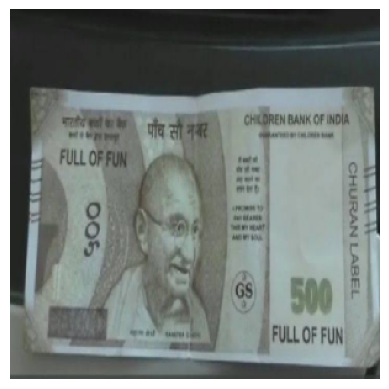

NameError: name 'finetune_model' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image  # ✅ Import this
from tensorflow.keras.models import load_model

# ✅ Load and preprocess the test image
img_path = rC:\Users\ekmmu\OneDrive\Documents\FakeCurrencyDetectionSystem-master\Dataset\Testing\Fake.jpeg"
img = image.load_img(img_path, target_size=(300, 300))  # Make sure this matches your model input shape
img_array = np.asarray(img)

plt.imshow(img)
plt.axis('off')
plt.show()

img_array = np.expand_dims(img_array, axis=0)  # (1, 300, 300, 3)

# ✅ Load the trained model weights
finetune_model.load_weights("Final_model.h5")

# ✅ Predict
output = finetune_model.predict(img_array)

# ✅ Interpret the output
if output[0][0] > output[0][1]:
    print("Fake")
else:
    print("Real")


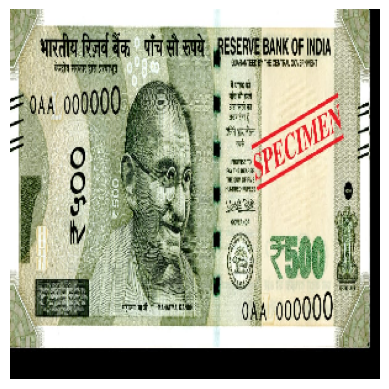

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
Fake


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image  # ✅ Import this
from tensorflow.keras.models import load_model

# ✅ Load and preprocess the test image
img_path = r"C:\Users\ekmmu\OneDrive\Documents\FakeCurrencyDetectionSystem-master\Dataset\Testing\fakee6.jpg"
img = image.load_img(img_path, target_size=(300, 300))  # Make sure this matches your model input shape
img_array = np.asarray(img)

plt.imshow(img)
plt.axis('off')
plt.show()

img_array = np.expand_dims(img_array, axis=0)  # (1, 300, 300, 3)

# ✅ Load the trained model weights
finetune_model.load_weights("Final_model.h5")

# ✅ Predict
output = finetune_model.predict(img_array)

# ✅ Interpret the output
if output[0][0] > output[0][1]:
    print("Fake")
# else:
    print("Real")
